In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [42]:
dataset_path = r'C:\Users\fadwa\Desktop\Diploma Project\plantvillage dataset\grayscale'

In [ ]:
# checking for class imbalance by counting the instances of each class
def count_images(path):
    plant_counts = {}
    for plant in os.listdir(path):
        plant_path = os.path.join(path, plant)
        if os.path.isdir(plant_path):
            total_count = 0
            has_subfolders = any(
                os.path.isdir(os.path.join(plant_path, f)) for f in os.listdir(plant_path)
            )
            
            if has_subfolders:
                for condition in os.listdir(plant_path):
                    condition_path = os.path.join(plant_path, condition)
                    if os.path.isdir(condition_path):
                        count = len([
                            f for f in os.listdir(condition_path)
                            if f.lower().endswith(('.jpg'))
                        ])
                        total_count += count
                        
            else:
                total_count = len([
                    f for f in os.listdir(plant_path)
                    if f.lower().endswith(('.jpg'))
                ])
            plant_counts[plant] = total_count
    return plant_counts

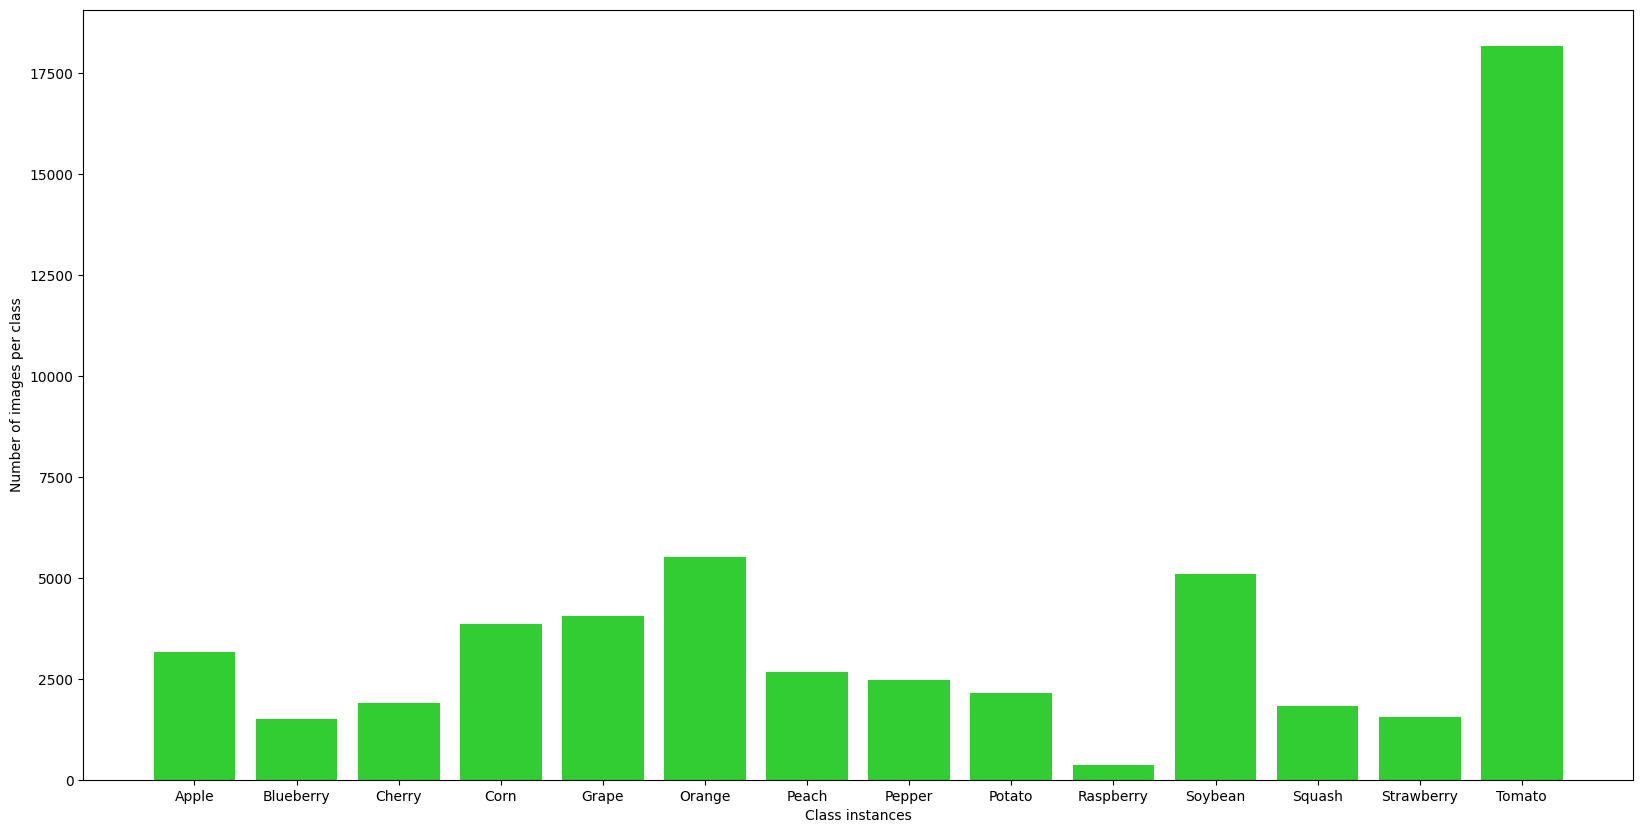

In [30]:
plt.figure(figsize=(20,10))
plt.bar(count_images(dataset_path).keys(), count_images(dataset_path).values(), color='limegreen')
plt.xlabel('Class instances')
plt.ylabel('Number of images per class')
plt.show()

In [39]:
def calc_dimensions(path):
    dimensions = []
    for plant in os.listdir(path):
        plant_path = os.path.join(path, plant)
        if not os.path.isdir(plant_path):
            continue

        has_subfolders = any(
            os.path.isdir(os.path.join(plant_path, f)) for f in os.listdir(plant_path)
        )

        if has_subfolders:
            for condition in os.listdir(plant_path):
                condition_path = os.path.join(plant_path, condition)
                if not os.path.isdir(condition_path):
                    continue

                for fname in os.listdir(condition_path):
                    if fname.lower().endswith('.jpg'):
                        fpath = os.path.join(condition_path, fname)
                        img = Image.open(fpath)
                        dimensions.append(img.size)

        else:
            for fname in os.listdir(plant_path):
                if fname.lower().endswith('.jpg'):
                    fpath = os.path.join(plant_path, fname)
                    img = Image.open(fpath)
                    dimensions.append(img.size)
    return dimensions

Total images processed: 54303


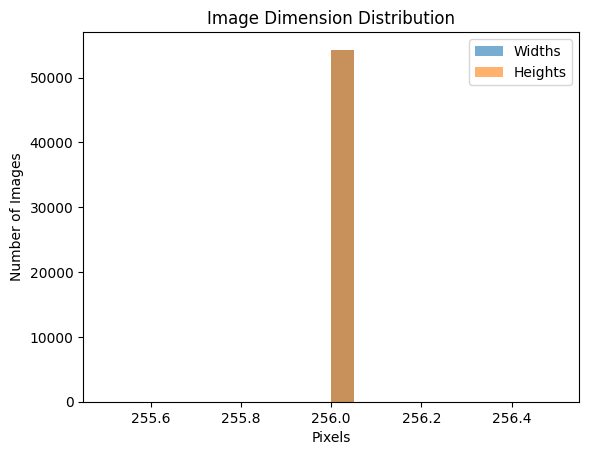

In [41]:
dims = calc_dimensions(dataset_path)
print(f"Total images processed: {len(dims)}")

widths, heights = zip(*dims)
plt.hist(widths, bins=20, alpha=0.6, label='Widths')
plt.hist(heights, bins=20, alpha=0.6, label='Heights')
plt.legend()
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Number of Images")
plt.show()

We arrive at two conclusions about the dataset 
1. It's an imbalanced dataset. It must be addressed to avoid bias in the training & inaccurate evaluation metrics.
2. The images in this dataset is of uniform dimensions. So, there is no need for transformations to adjust image size. But data augmentation will be helpful to train the model to be more robust. 